In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

https://www.linkedin.com/in/rdudhat-iitbhilai/

In [2]:
#warnings ko ignore karne ke liye
warnings.filterwarnings("ignore")


In [4]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)
#preferred style 


In [6]:
df = sns.load_dataset("penguins")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [11]:
print(df.describe())#summary stats (for numerical)

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [12]:
print(df.describe(include=['object'])) #summary stats (for categorical) 

       species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       152     168   168


In [14]:
df=df.dropna()
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

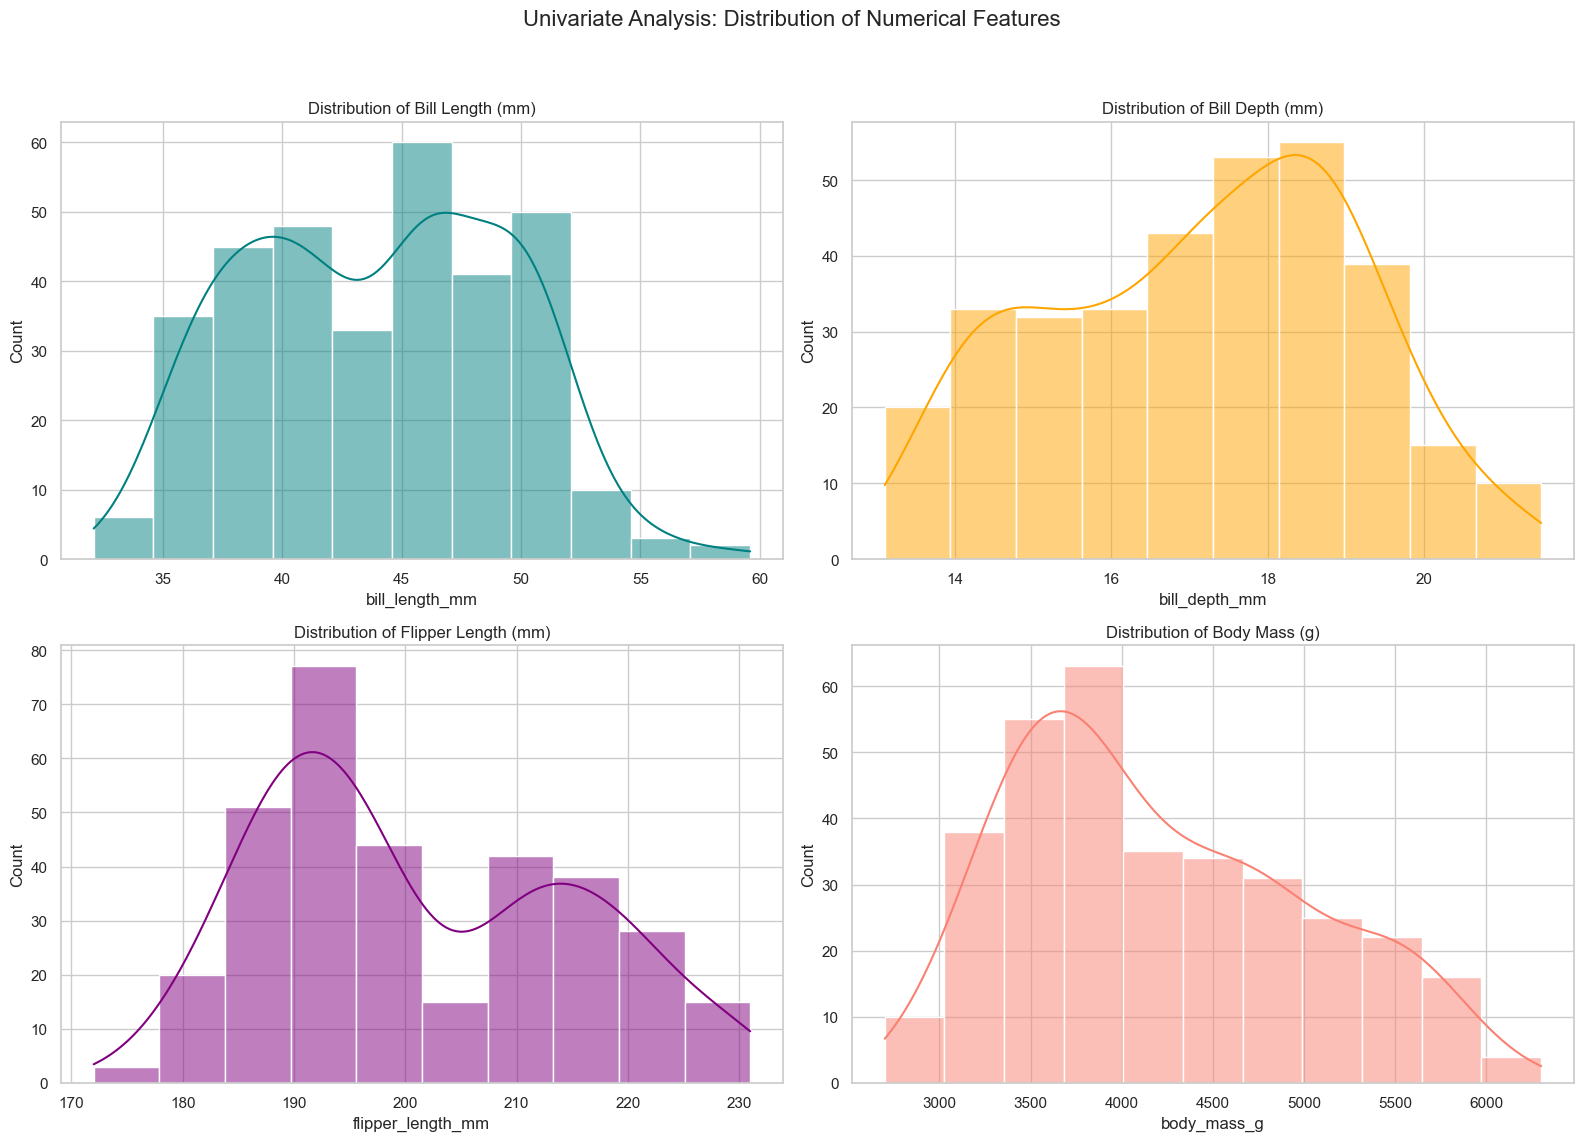

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Univariate Analysis: Distribution of Numerical Features', fontsize=16)

sns.histplot(data=df, x='bill_length_mm', kde=True, ax=axes[0, 0], color='teal')
axes[0, 0].set_title('Distribution of Bill Length (mm)')
sns.histplot(data=df, x='bill_depth_mm', kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Distribution of Bill Depth (mm)')
sns.histplot(data=df, x='flipper_length_mm', kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Distribution of Flipper Length (mm)')
sns.histplot(data=df, x='body_mass_g', kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Distribution of Body Mass (g)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

| Feature Name | Distribution Pattern | Analytical Significance |
| :--- | :--- | :--- |
| **Bill Length (mm)** | **Multimodal (Bimodal)** with distinct peaks around 40mm and 45mm. | Indicates a **mixed population** structure; highly effective for distinguishing short-billed species (Adelie) from long-billed ones (Chinstrap/Gentoo). |
| **Bill Depth (mm)** | **Broad / Platykurtic** spread with significant overlap between 14mm and 19mm. | Functions as a **weak standalone classifier** due to high overlap; requires pairing with Bill Length to effectively separate species clusters. |
| **Flipper Length (mm)** | **Distinctly Bimodal** pattern with a clear "valley" of low density around 205mm. | Acts as the **strongest individual discriminator**, cleanly separating the dataset into two structural groups: small-flippered (Adelie/Chinstrap) and large-flippered (Gentoo). |
| **Body Mass (g)** | **Right-Skewed** distribution, peaking at 3500-4000g with a tail extending to 6000g. | Reveals that the **dominant subgroup** is lighter in weight, while the heavier Gentoo species represents the tail, confirming size-based hierarchy in the dataset. |

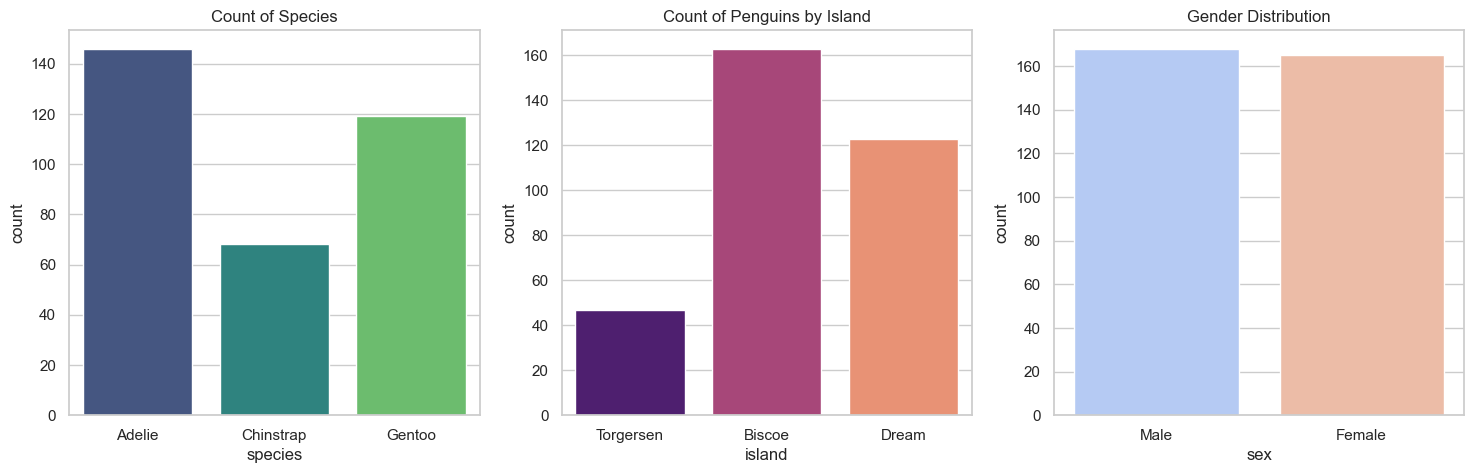

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='species', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Count of Species')
sns.countplot(x='island', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Count of Penguins by Island')
sns.countplot(x='sex', data=df, ax=axes[2], palette='coolwarm')
axes[2].set_title('Gender Distribution')
plt.show()

| Feature Name | Distribution Pattern | Analytical Significance |
| :--- | :--- | :--- |
| **Species** | **Imbalanced Distribution** <br> **Adelie** is the dominant class (~146), followed by **Gentoo** (~120), while **Chinstrap** is the minority class (~68). | The dataset is not perfectly balanced. Models trained on this data may develop a bias toward predicting "Adelie" unless techniques like Stratified K-Fold or class weighting are applied. |
| **Island** | **Uneven Geographic Split** <br> **Biscoe** has the highest population count (~165), **Dream** is secondary (~124), and **Torgersen** is significantly underrepresented (<50). | Indicates a spatial bias in data collection. The low count for Torgersen suggests it might host only specific species (likely Adelie), making Island a potentially strong proxy variable for Species. |
| **Sex** | **Near-Perfect Balance** <br> The counts for **Male** and **Female** are almost identical (approx. 165 each). | This is an ideal scenario for statistical analysis. It ensures that any model trained using 'Sex' as a feature will not be biased toward one gender due to sampling frequency. |

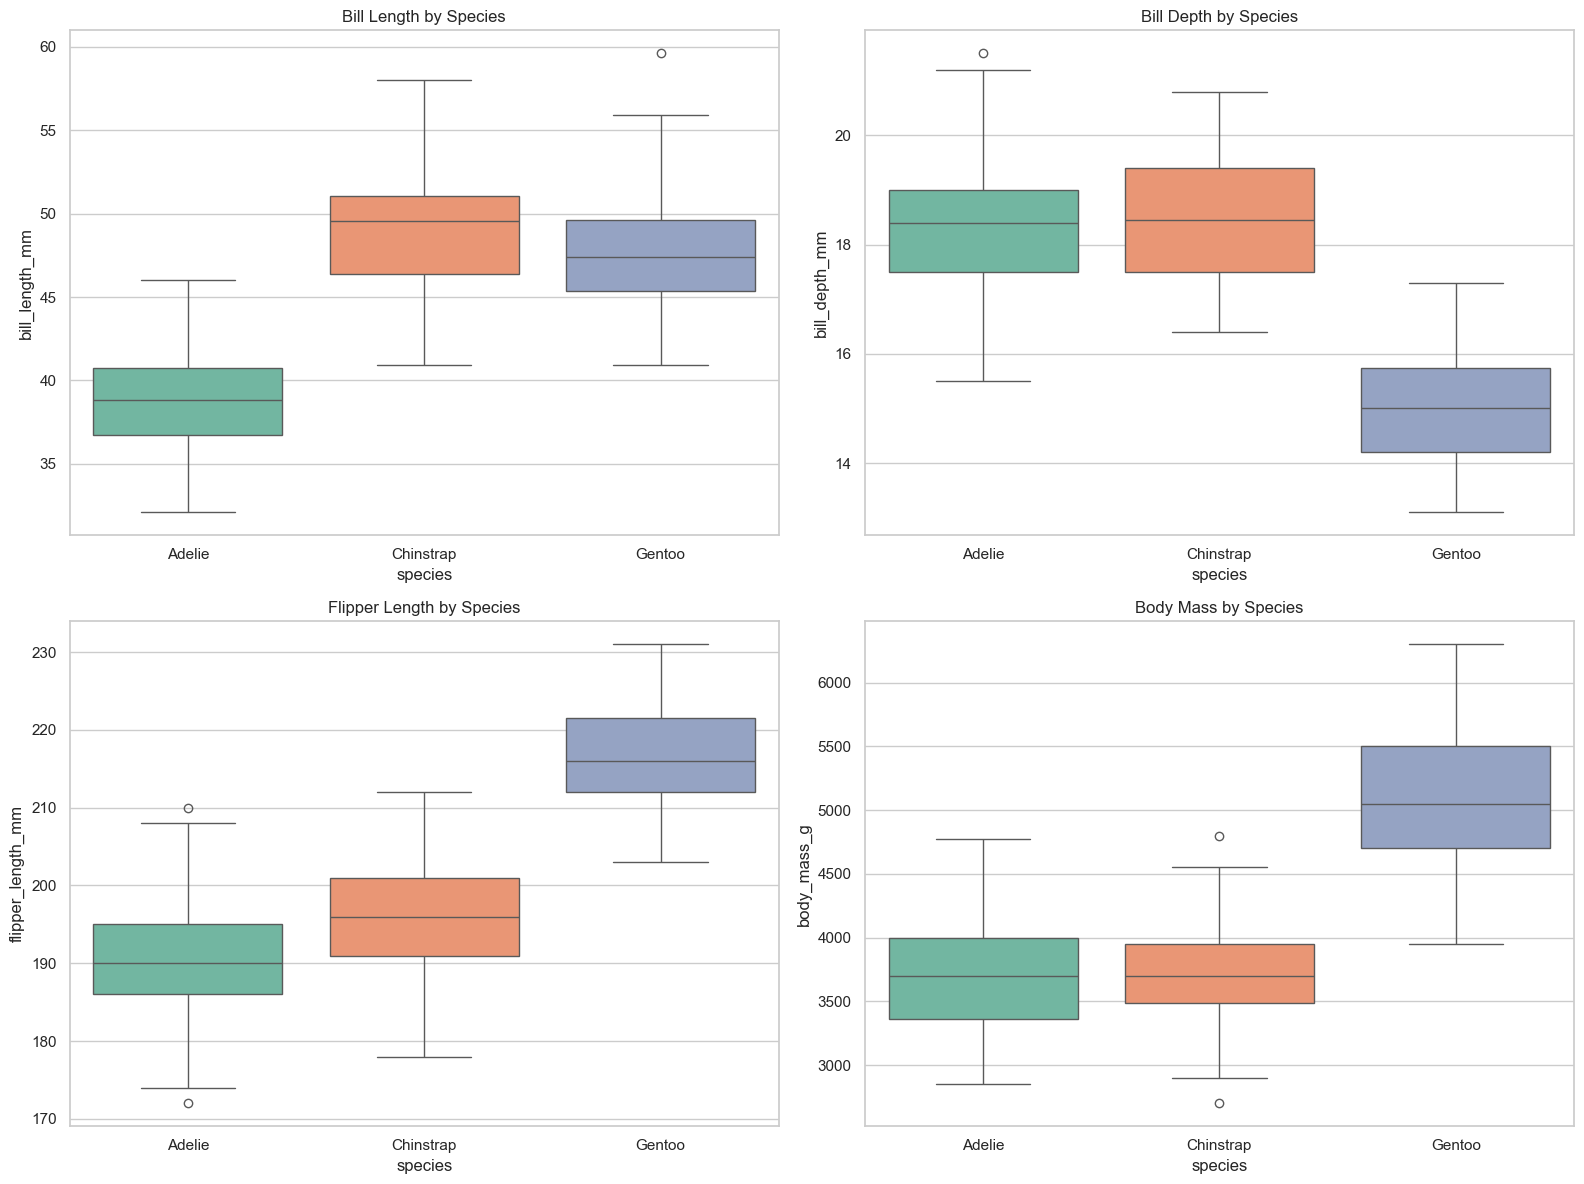

In [19]:
# Boxplots to compare distributions across species
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(x='species', y='bill_length_mm', data=df, ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Bill Length by Species')
sns.boxplot(x='species', y='bill_depth_mm', data=df, ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Bill Depth by Species')
sns.boxplot(x='species', y='flipper_length_mm', data=df, ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Flipper Length by Species')
sns.boxplot(x='species', y='body_mass_g', data=df, ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Body Mass by Species')

plt.tight_layout()
plt.show()



| Feature Interaction | Distribution Pattern & Boxplot Analysis | Analytical Significance |
| :--- | :--- | :--- |
| **Bill Length by Species** | **Strong Separation for Adelie** <br> **Adelie** has a significantly shorter median bill (~39mm). **Chinstrap** and **Gentoo** have overlapping, longer distributions (~47-50mm). | This feature is the primary differentiator for **Adelie**. If the bill is short, the probability of the penguin being an Adelie is very high. |
| **Bill Depth by Species** | **Inverse Separation for Gentoo** <br> **Gentoo** penguins have distinctly shallow bills (median ~15mm), while **Adelie** and **Chinstrap** both have deep bills (medians ~18.5mm). | This feature is critical for distinguishing **Gentoo** from the other two. It essentially acts as the inverse of the Flipper/Mass trends (where Gentoo is usually "more", here it is "less"). |
| **Flipper Length by Species** | **Clear Hierarchical Stratification** <br> **Gentoo** shows massive separation with the highest median (~216mm). **Chinstrap** (~196mm) is slightly larger than **Adelie** (~190mm), but they are closer to each other than to Gentoo. | Indicates **Gentoo** is a larger, more distinct species physically. The minimal overlap between Gentoo and the others makes this the single most robust feature for binary classification (Gentoo vs. Non-Gentoo). |
| **Body Mass by Species** | **High Overlap between Adelie & Chinstrap** <br> **Gentoo** is the heaviest (median ~5000g). **Adelie** and **Chinstrap** have nearly identical mass distributions (medians ~3700g). | Mass is excellent for identifying **Gentoo**, but it is a **useless feature** for distinguishing between Adelie and Chinstrap due to the high degree of overlap. |

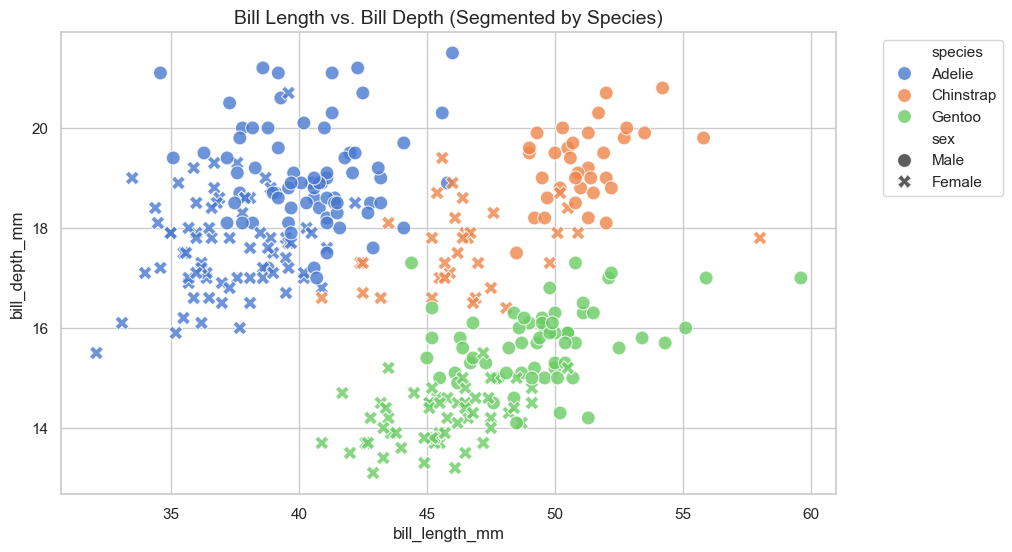

In [32]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex', s=100, alpha=0.8)
plt.title('Bill Length vs. Bill Depth (Segmented by Species)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

| Species / Group (Cluster) | Spatial Distribution (Coordinates) | Analytical Significance |
| :--- | :--- | :--- |
| **Adelie (Blue Cluster)** | **Top-Left Quadrant** <br> Characterized by **Short Length** (<42mm) and **High Depth** (>16mm). | Completely linearly separable from the other two species based on Bill Length. If the bill is under 40mm, it is almost certainly an Adelie. |
| **Gentoo (Green Cluster)** | **Bottom-Right Quadrant** <br> Characterized by **Long Length** (>45mm) and **Low Depth** (<17mm). | This cluster is isolated at the bottom of the chart. The **Low Bill Depth** is the unique identifier for Gentoo, making it distinct from the deep-billed Adelie and Chinstrap. |
| **Chinstrap (Orange Cluster)** | **Top-Right Quadrant** <br> Characterized by **Long Length** (>45mm) and **High Depth** (>17mm). | Occupies a "hybrid" space: it shares the **Depth** of an Adelie but the **Length** of a Gentoo. This makes it identifiable only when both dimensions are plotted together. |
| **Intra-Cluster Sex Split** | **Systematic Shift** <br> Within every species cluster, Males (Circles) consistently appear to the **top-right** of Females (Crosses). | Visually confirms **Sexual Dimorphism**: Males have consistently longer and deeper bills than females of the same species, suggesting 'Sex' is a necessary variable for high-precision models. |

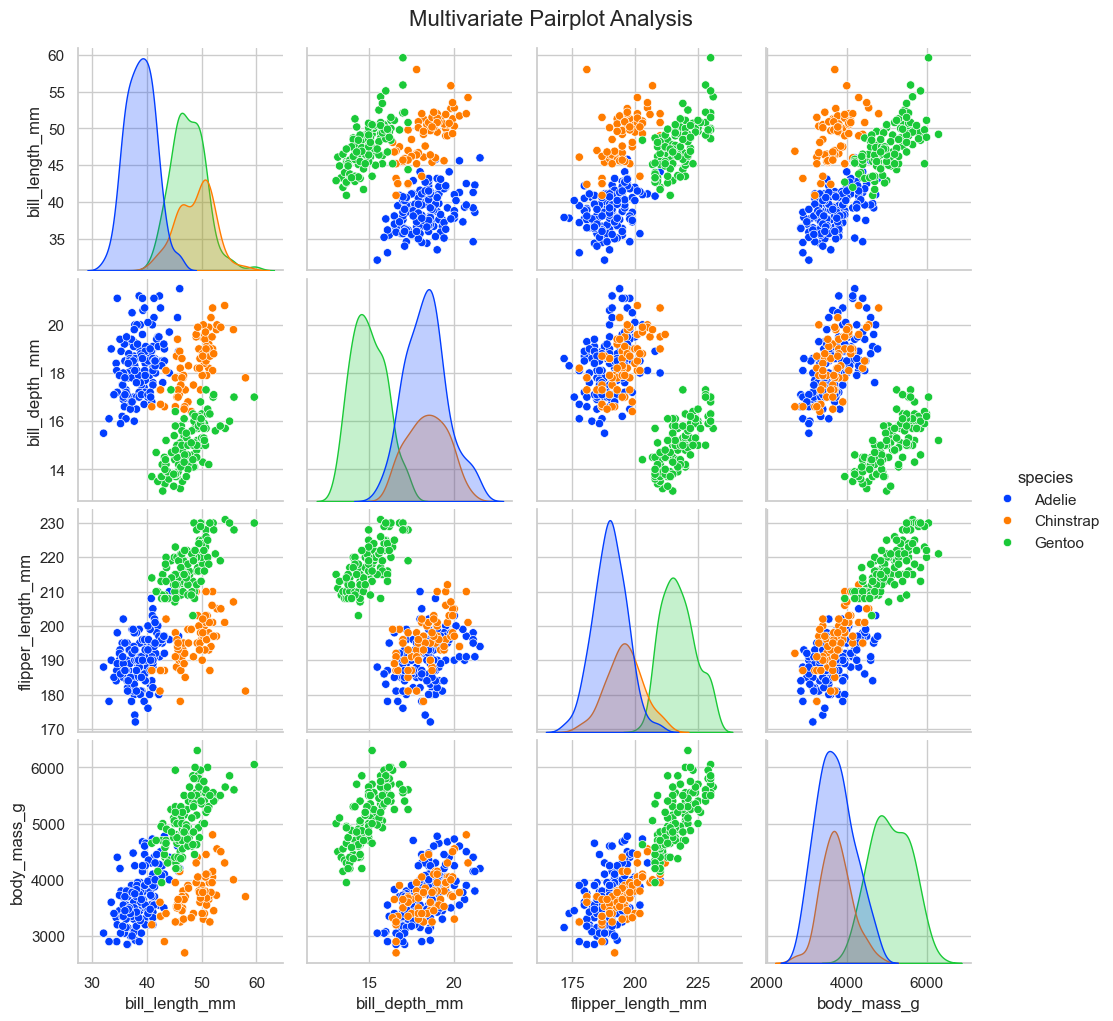

<Figure size 1000x800 with 0 Axes>

In [22]:

sns.pairplot(df, hue='species', diag_kind='kde', palette='bright', height=2.5)
plt.suptitle('Multivariate Pairplot Analysis', y=1.02, fontsize=16)
plt.show()
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation as categorical columns cannot be correlated
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()


| Feature Interaction / View | Visual Pattern | Analytical Significance |
| :--- | :--- | :--- |
| **Diagonal KDE Plots (Distributions)** | **Species-Specific Peaks** <br> **Gentoo (Green)** is isolated on the far right for Flipper Length and Body Mass. **Adelie (Blue)** is isolated on the far left for Bill Length. | Confirms that no single variable perfectly separates all three species, but specific variables separate specific pairs. **Flipper Length** is the best single separator for Gentoo, while **Bill Length** is best for Adelie. |
| **Bill Length vs. Bill Depth** | **Three Distinct Clusters** <br> This plot (Row 2, Col 1) shows the clearest separation. The three colors form non-overlapping groups. | This is the **"Golden Pair"** for classification. It achieves near 100% separability: Adelie (Short/Deep), Chinstrap (Long/Deep), and Gentoo (Long/Shallow). |
| **Flipper Length vs. Body Mass** | **Strong Positive Linearity** <br> (Row 4, Col 3) shows a tight linear trend rising from bottom-left (Adelie/Chinstrap) to top-right (Gentoo). | Indicates high **Multicollinearity**. As penguins get heavier, their flippers get longer. The tight correlation suggests that using both features in a model might be redundant (feature redundancy). |
| **Adelie vs. Chinstrap Separation** | **Size Overlap, Beak Difference** <br> In Mass and Flipper plots, Blue (Adelie) and Orange (Chinstrap) overlap almost completely. They only separate in Bill Length plots. | Analytically, this means Adelie and Chinstrap are **morphologically similar** in body size. To distinguish them, a model *must* rely on Bill metrics, not Body Mass or Flipper Length. |

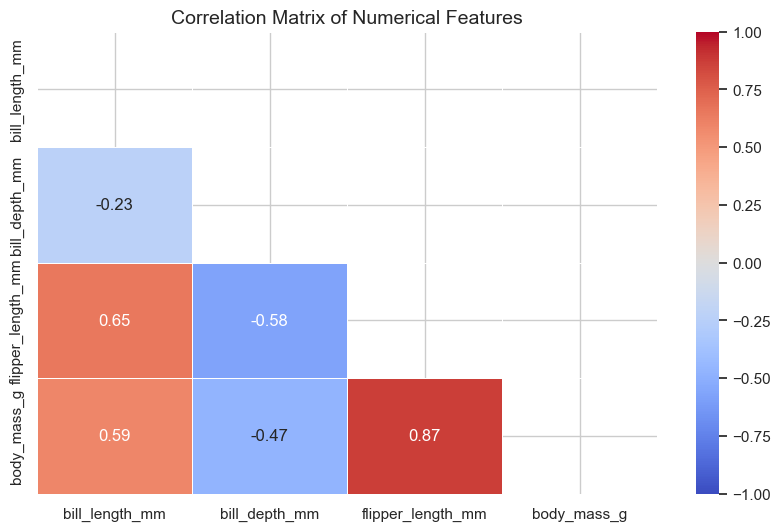

In [27]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))#i have masked the upper triangle for better readability (redundancy reduce karne ke liye)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()

| Feature Pair | Correlation Coefficient ($r$) | Analytical Significance |
| :--- | :--- | :--- |
| **Flipper Length vs. Body Mass** | **Strong Positive (+0.87)** | This is the strongest correlation in the dataset. It indicates a clear physical law: as penguins get heavier, their flippers get longer to support swimming propulsion. This **multicollinearity** implies you likely don't need both features for simple models. |
| **Flipper Length vs. Bill Length** | **Moderate Positive (+0.65)** | Generally, larger birds (Gentoo) have longer bills. However, the correlation isn't perfect because Adelie penguins are small but have relatively substantial bills for their size compared to Chinstraps. |
| **Bill Depth vs. Flipper Length** | **Moderate Negative (-0.58)** | This negative relationship is driven by the **Gentoo** species. Gentoos have the longest flippers but the *shallowest* bills. As the dataset shifts toward "larger" penguins (Gentoo), the bill depth actually *decreases*. |
| **Bill Length vs. Bill Depth** | **Weak Negative (-0.23)** | **Simpson's Paradox.** While individual species show positive or null correlations (bigger bird = bigger beak), combining all species creates a negative trend because the largest species (Gentoo) has the shallowest bill, inverting the global trend. |
| **Body Mass vs. Bill Depth** | **Moderate Negative (-0.47)** | Similar to the Flipper/Depth relationship. Heavier penguins (Gentoo) tend to have shallower bills, creating a negative correlation that might be counterintuitive without knowledge of the specific species traits. |

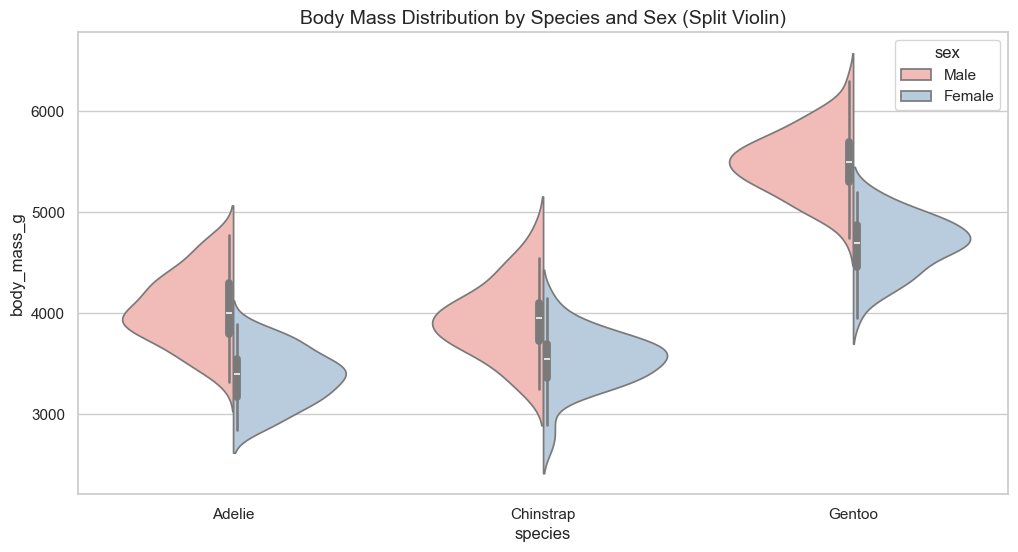

In [29]:
# Violin Plot split by Sex
plt.figure(figsize=(12, 6))
sns.violinplot(x="species", y="body_mass_g", hue="sex", split=True, data=df, palette="Pastel1")
plt.title('Body Mass Distribution by Species and Sex (Split Violin)', fontsize=14)
plt.show()


| Feature / Group Interaction | Visual Pattern & Distribution Shape | Analytical Significance |
| :--- | :--- | :--- |
| **Sexual Dimorphism (Global)** | **Consistent Vertical Shift** <br> Across all three species, the **Male** (Pink/Left) distribution is consistently shifted higher on the Y-axis than the **Female** (Blue/Right). | Confirms a biological law: Males are heavier than females in all penguin species. This systematic offset means 'Sex' is a crucial feature to normalize data (e.g., a heavy female might look like a light male). |
| **Gentoo Species (Right)** | **Distinct Elevation** <br> The entire Gentoo violin plot floats significantly higher (range: 4000g–6000g) compared to Adelie and Chinstrap. | Reconfirms **Gentoo** as the largest species. The lack of overlap with the other two species' distributions makes Mass a deterministic feature for identifying Gentoo. |
| **Adelie vs. Chinstrap** | **High Overlap** <br> The violins for Adelie and Chinstrap are positioned at nearly the exact same height (range: 3000g–4500g). | Mass is a **non-informative feature** for distinguishing between Adelie and Chinstrap. A model relying on weight alone would fail to separate these two classes. |
| **Distribution Shape** | **Gaussian (Normal-like)** <br> Most halves of the violins show a wider middle and narrower ends, resembling a normal distribution. | The data follows a standard normal distribution within subgroups. This implies that parametric statistical tests (like ANOVA or T-Tests) and models assuming normality (like Gaussian Naive Bayes) would perform well. |

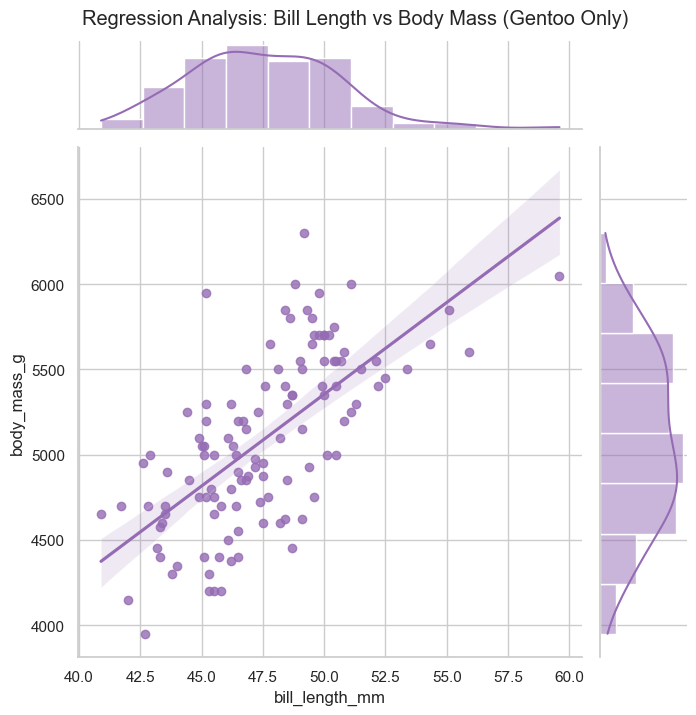

In [30]:
# Jointplot with Regression Line (Gentoo only for cleaner view)
gentoo_data = df[df['species'] == 'Gentoo']
g = sns.jointplot(x="bill_length_mm", y="body_mass_g", data=gentoo_data, kind="reg", color="m", height=7)
g.fig.suptitle("Regression Analysis: Bill Length vs Body Mass (Gentoo Only)", y=1.02)
plt.show()

| Feature Interaction / View | Visual Pattern & Trend | Analytical Significance |
| :--- | :--- | :--- |
| **Regression Line (Slope)** | **Positive Linear Trend** <br> The solid purple line slopes upward from left to right. As Bill Length increases (40mm $\to$ 60mm), Body Mass increases (4500g $\to$ 6000g). | Confirms a positive correlation *within* the species. Unlike the global dataset where Simpson's Paradox might confuse trends, intra-species analysis shows that bigger beaks correlate with bigger bodies. |
| **Confidence Interval** | **Narrow Shading** <br> The translucent shading around the regression line is tight and narrow. | Indicates **high confidence** in the model. The relationship is consistent, and the linear model is a good fit for predicting mass based on bill length for Gentoos. |
| **Marginal Histograms** | **Normal (Gaussian) Distribution** <br> Both the top (Bill Length) and right (Body Mass) histograms display bell-shaped curves. | Validates the statistical assumptions required for Linear Regression (normality of features). It suggests the data is well-behaved and free of severe skew. |
| **Scatter Dispersion** | **Moderate Variance** <br> While the trend is clear, points are scattered moderately around the line rather than lying perfectly on it. | Suggests that while Bill Length explains *some* variance in mass, it doesn't explain *all* of it. Other factors (like sex or age) likely contribute to the remaining variance. |

##      FINAL OBSERVATIONS

| Key Observation | Pattern / Evidence | Strategic Implication |
| :--- | :--- | :--- |
| **The "Golden" Separator** | **Bill Length vs. Bill Depth** <br> While individual features have overlap, plotting these two dimensions creates three non-overlapping, distinct clusters for Adelie, Chinstrap, and Gentoo. | **Feature Engineering:** A simple model (KNN or Decision Tree) using *only* these two features can achieve near-perfect classification accuracy, reducing computational cost. |
| **Feature Redundancy** | **Flipper Length $\approx$ Body Mass** <br> These two features have a correlation coefficient of **0.87**. They rise and fall together almost perfectly. | **Dimensionality Reduction:** You should likely drop one of these features (probably Body Mass, as Flipper Length is more distinct) to avoid **Multicollinearity** in linear models like Logistic Regression. |
| **The "Gentoo" Anomaly** | **Size Hierarchy** <br> Gentoo penguins are statistically significantly larger (mass/flipper) and have shallower bills than the other two species. | **Hierarchical Modeling:** The dataset naturally splits into "Big Penguins" (Gentoo) and "Small Penguins" (Others). A binary classifier could filter out Gentoos first, leaving a simpler sub-problem for the remaining two. |
| **Sexual Dimorphism** | **Systematic Bias** <br> Males are consistently larger than females within every species cluster. | **Data Normalization:** If your model ignores 'Sex', it may misclassify a large female as a small male. 'Sex' must be included as a feature, or physical metrics should be normalized (e.g., $Metric / Mean_{sex}$). |
| **Hardest Classification** | **Adelie vs. Chinstrap** <br> These two species have nearly identical Body Mass and Flipper Lengths. | **Critical Feature:** To distinguish these two, the model *cannot* rely on size. It must rely entirely on **Bill Length** (Adelie < 40mm, Chinstrap > 45mm). |

| Limitation Area | Observation / Constraint | Impact on Validity & Modeling |
| :--- | :--- | :--- |
| **Geographic Bias** | **Localized Data Source** <br> All samples were collected exclusively from the Palmer Archipelago, Antarctica. | **Lack of Generalizability.** The insights are region-specific. The model may fail if applied to penguins in different Antarctic zones where diet or climate differs. |
| **Sample Size** | **Small Dataset ($N=344$)** <br> After cleaning missing values, the effective sample size drops to 333 observations. | **High Variance Risk.** The dataset is too small for complex algorithms (like Deep Learning). It is best suited for low-complexity models (Logistic Regression, Decision Trees) to avoid overfitting. |
| **Class Imbalance** | **Minority Class (Chinstrap)** <br> Chinstrap penguins represent only ~19% of the dataset, while Adelie represents ~44%. | **Prediction Bias.** Standard accuracy metrics will be misleading. A model could simply guess "Adelie" or "Gentoo" and still achieve high accuracy while failing to detect Chinstraps. |
| **Feature Correlation** | **Multicollinearity** <br> Flipper Length and Body Mass have a correlation of $0.87$. | **Unstable Coefficients.** In linear models (like Linear Regression), it becomes difficult to isolate the individual effect of mass vs. flipper length, leading to unstable feature importance scores. |
| **Species Scope** | **Limited Taxonomy** <br> The dataset covers only 3 of the approximately 18 known penguin species. | **Narrow Scope.** The model cannot be used as a general "Penguin Classifier." It is strictly a "Palmer Archipelago Species Classifier." |